# Market Segmentation

### Import the necessary libraies


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the data
data = pd.read_csv("D:/Data Analytics/Intern/Feynn Labs/mcdonalds.csv")
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


### Exploratory Data Analysis

In [4]:
data.info() # getting information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
print(data.columns) #print the column names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [6]:
data.shape # getting the dimension

(1453, 15)

In [7]:
# cleaning the data
# the values you want to replace
values_to_replace = ["I love it!+5","I hate it!-5"]

# the replacement value
replacement_value = [+5,-5]

# Replace the specific values
data['Like'].replace(to_replace=values_to_replace, value=replacement_value, inplace=True)

# Print the updated DataFrame
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [41]:
from sklearn.preprocessing import LabelEncoder

def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

In [8]:
# Select columns 1 to 11 and converting to matrix
MD_x = data.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [9]:
MD_x # this is the array that we converted

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [10]:
x = data.iloc[:, :11]

In [11]:
# perfoming PCA
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_df = pd.DataFrame(data =MD_pca, columns = [f'PC{i+1}' for i in range(len(x.columns))])

# Summary of PCA
print("Standard deviation of the principal components:")
print(pca.explained_variance_)
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviation of the principal components:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance explained by each principal component:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


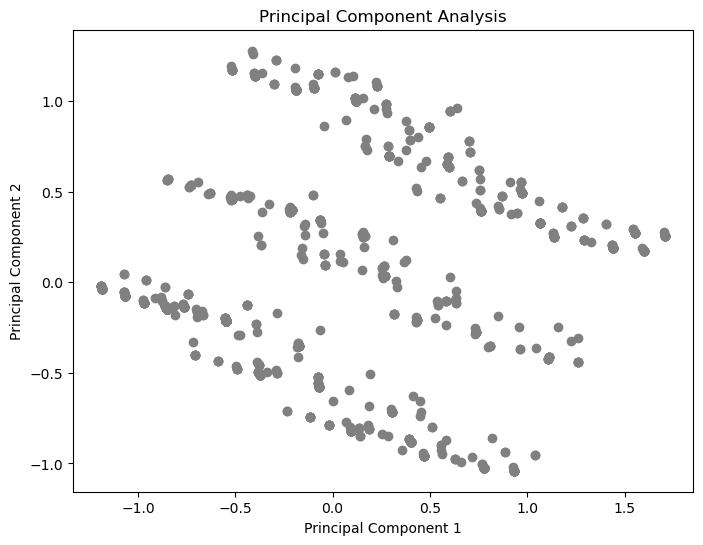

In [12]:
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

### ExtractingSegments


**Using K-Means**

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # used to evaluate the quality of a clustering algorithm

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering for different number of clusters
n_clusters_range = range(2, 9)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(MD_x)
    silhouette_avg = silhouette_score(MD_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on silhouette score
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]

# Perform KMeans clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=1234)
cluster_labels_optimal = kmeans_optimal.fit_predict(MD_x)


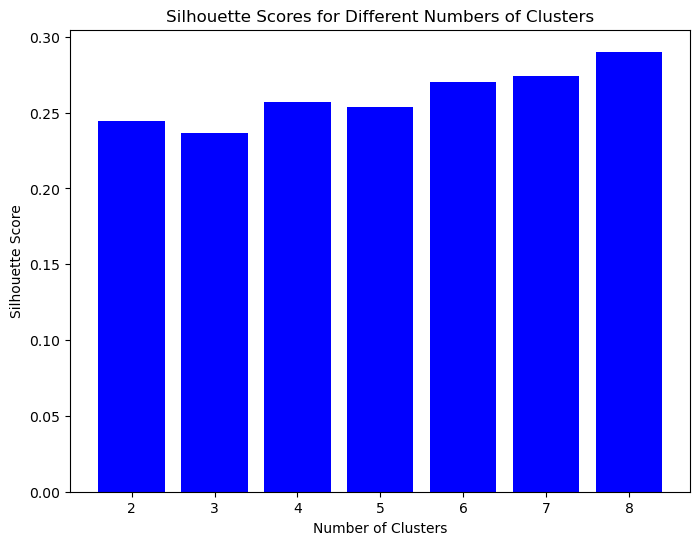

In [14]:
# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.bar(n_clusters_range, silhouette_scores, color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(n_clusters_range)
plt.show()

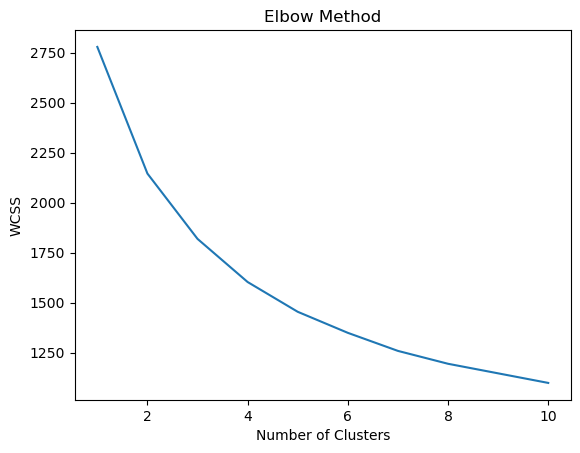

In [30]:
# find no.segments using elblow method
wcss = []
seg={}

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=1)
    cluster_labels=kmeans.fit(MD_x)
    seg[k]=cluster_labels
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS


# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Here the plot levels off at 5, So we take 5.

In [26]:
# K means clustering
model = KMeans(n_clusters = 4,random_state = 5)
cluster = model.fit_predict(MD_x)
data['cluster'] = cluster

C:\Users\Asus1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
np.random.seed(1234)
k_range = range(2,9)

# Number of bootstrap samples
nb =100
bootstrap_results =[]
for _ in range(nb):
    bootstrap_sample_indices = np.random.choice(len(MD_x), size=len(MD_x), replace=True)
    bootstrap_sample = MD_x[bootstrap_sample_indices]

      # Dictionary to store clustering results for this bootstrap sample
    bootstrap_s_r = {}
     # Perform k-means clustering for each k value
    for k in k_range:
        clusterer = KMeans(n_clusters=k, n_init=10, random_state=1234)
        cluster_labels = clusterer.fit_predict(bootstrap_sample)
        bootstrap_s_r[k] = cluster_labels
    bootstrap_results.append(bootstrap_s_r)

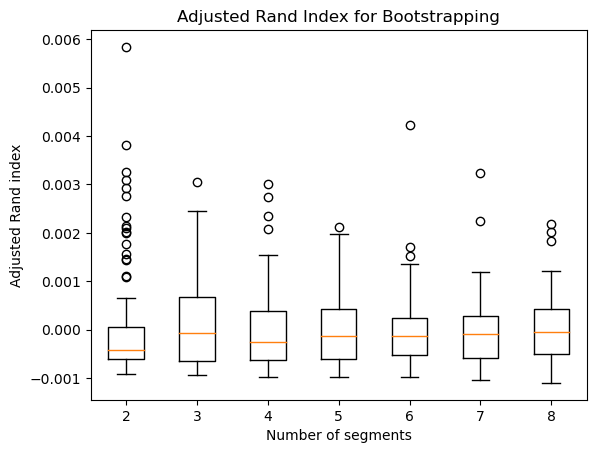

In [18]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
np.random.seed(1234)
k_range = range(2, 9)
# Number of repetitions
nrep = 10
nboot=100
ari_scores=[]
for k in k_range:
    k_ari_scores = []
    for _ in range(nboot):
        bootstrap_sample = resample(MD_x, replace=True)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        cluster_labels = kmeans.fit_predict(bootstrap_sample)
        true_labels = np.random.randint(0, 2, size=len(cluster_labels))
        ari = adjusted_rand_score(true_labels, cluster_labels)
        k_ari_scores.append(ari)
    ari_scores.append(k_ari_scores)

plt.boxplot(ari_scores, labels=k_range)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index for Bootstrapping')
plt.show()

**Using Mixtures of Distributions**

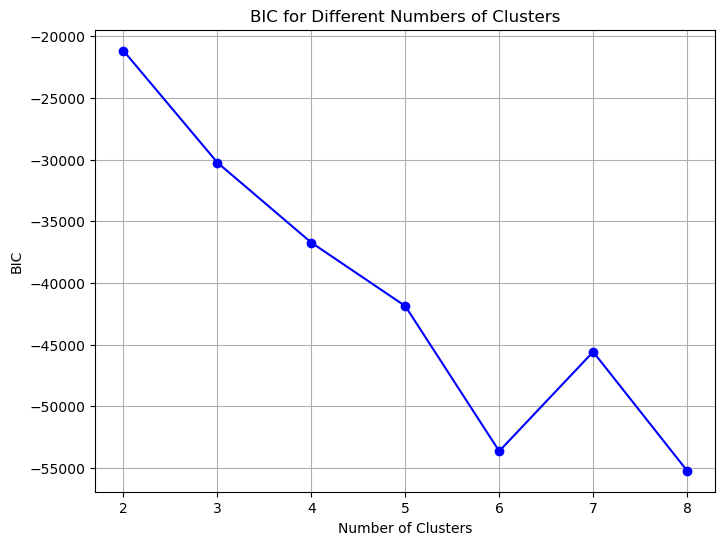

In [19]:
# Using GussianMixture instead of stepFlexmix()
from sklearn.mixture import GaussianMixture

# Set seed for reproducibility
np.random.seed(1234)

# Define the range of cluster numbers
n_clusters_range = range(2, 9)

# Fit mixture models for different numbers of clusters
bic_values = []
for n_clusters in n_clusters_range:
    model = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    model.fit(MD_x)
    bic_values.append(model.bic(MD_x))

# Plot the BIC values
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, bic_values, marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Different Numbers of Clusters')
plt.grid(True)
plt.show()

### Profiling Segments

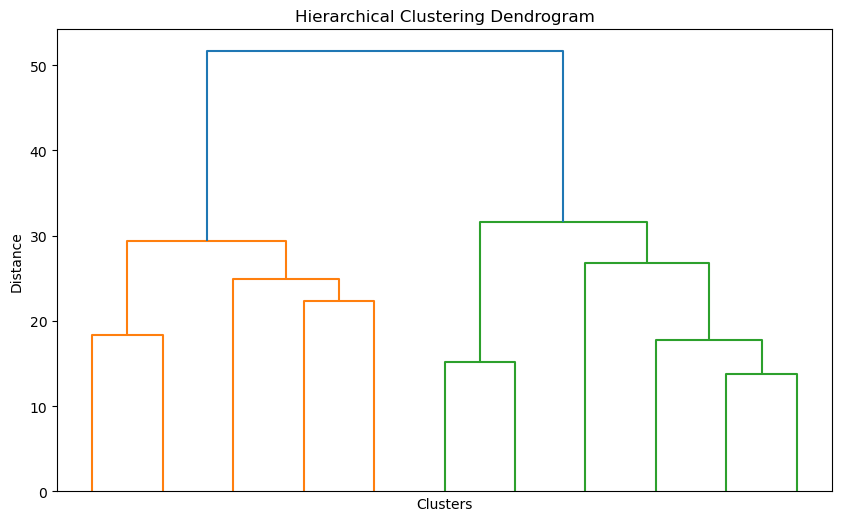

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='ward')

# Plot the barchart
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

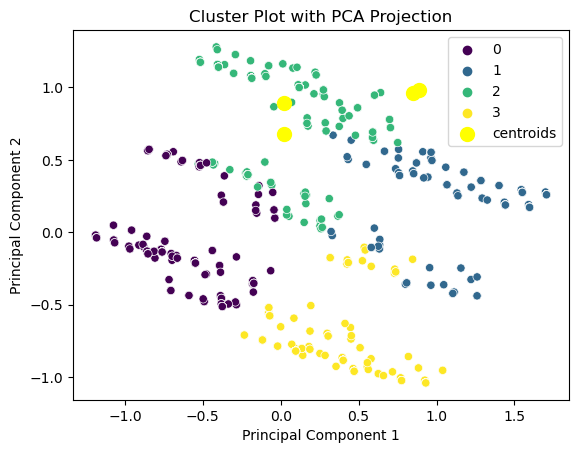

In [33]:
# Plot the clusters with PCA projection
#Visulazing clusters
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=model.labels_,palette = 'viridis')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
            c='yellow', s=100, label="centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with PCA Projection')
plt.legend()
plt.show()



### Discrbing Segments

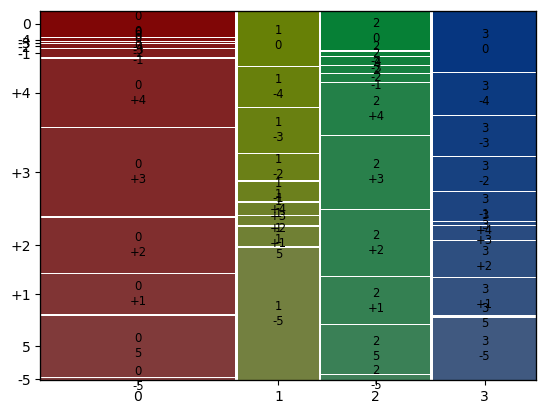

In [34]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
mosaic(pd.crosstab(cluster,data['Like']).stack())
plt.show()

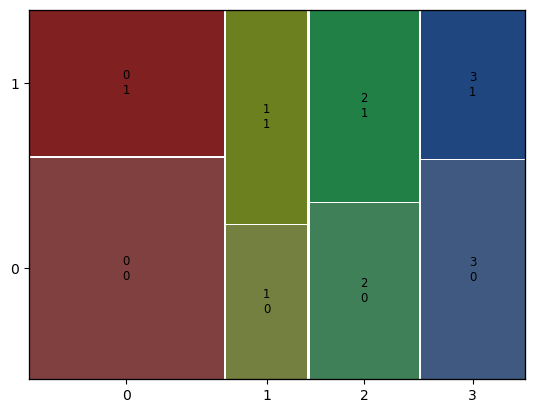

In [58]:
#Mosaic plot gender vs segment
mosaic(pd.crosstab(cluster,data['Gender']).stack())
plt.show()

### Selecting Target Segment

In [44]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster,VisitFrequency
0,0,2.584483
1,1,2.668050
2,2,2.540123
3,3,2.818182


In [52]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster,Like
0,0,3.862069
1,1,6.547718
2,2,3.904321
3,3,5.425325


In [49]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster,Gender
0,0,0.398276
1,1,0.580913
2,2,0.521605
3,3,0.405844


In [54]:
segment = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
segment

,cluster,Gender,Like,VisitFrequency
0,0,0.398276,3.862069,2.584483
1,1,0.580913,6.547718,2.668050
2,2,0.521605,3.904321,2.540123
3,3,0.405844,5.425325,2.818182


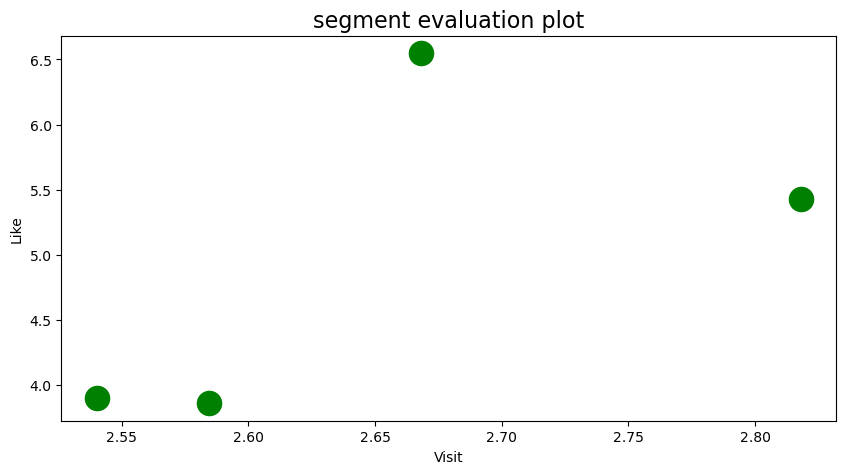

In [55]:
#Target segments
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("segment evaluation plot",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()